In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import os, shutil, random
import numpy as np
import pandas as pd
import gym
import tensorflow as tf
from tensorflow.python import debug as tf_debug

%matplotlib inline
import matplotlib.pyplot as plt

tf.reset_default_graph()

try:
    sess.close()
except NameError:
    pass
finally:
    sess = None

sess = tf.Session()
# sess = tf_debug.TensorBoardDebugWrapperSession(sess, "localhost:7007")
# sess.as_default()

In [3]:
out_dir = '/tmp/ddpg/experiment_2018-08-06'

# Beginning

Let's start with the simple ddpg network without batch normalization, whose performance will be compared with the other versions with batch normalization.

## Version 1 (v1)

### Critic Network

  * q
    * dense(1)
    * relu
    * dense(256)
    * concat
      * obs_net
        * relu
        * dense(256)
        * observation
      * action
  
### Actor Network

  * u
    * tanh
    * dense(1)
    * relu
    * dense(256)
    * observation


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
(3,)
(1,)


[-0.82983324  0.55801147 -0.04667478] [0.05190554] -6.500706675038886 [-0.84027473  0.54216085  0.37961965] False
#200	return: -1275.764927390738	actor_loss: 6.645090103149414	critic_loss: 0.14718148112297058
#401	return: -1476.2042840431075	actor_loss: 6.827027797698975	critic_loss: 0.028175273910164833
#602	return: -1619.3373977525573	actor_loss: 8.222294807434082	critic_loss: 0.01955154724419117
#803	return: -1755.0804999684917	actor_loss: 7.706195831298828	critic_loss: 0.035336483269929886
#1004	return: -1652.0350132880103	actor_loss: 7.709897994995117	critic_loss: 0.06702608615159988
#1205	return: -1448.1866000115704	actor_loss: 8.323980331420898	critic_loss: 0.013699758797883987
#1406	return: -1770.1023534242445	actor_loss: 8.153390884399414	critic_loss: 0.04338107630610466
#1607	return: -1357.031364608897	actor_loss: 7.65463399887085	critic_loss: 0.050430573523044586
#1808	return: -1187.9211583327235	actor_loss: 7.9272050857543945	critic_loss: 0.06204680725932121
#2009	return: -

#16883	return: -1700.836167251625	actor_loss: 15.692496299743652	critic_loss: 0.014451130293309689
#17084	return: -1352.8000679403788	actor_loss: 14.889660835266113	critic_loss: 0.010412579402327538
#17285	return: -1698.8545472582878	actor_loss: 16.041339874267578	critic_loss: 0.00759127689525485
#17486	return: -1704.810033458106	actor_loss: 15.325368881225586	critic_loss: 0.012472031638026237
#17687	return: -1646.2278314845037	actor_loss: 16.40294647216797	critic_loss: 0.0060033733025193214
#17888	return: -1602.7391225863805	actor_loss: 15.49304485321045	critic_loss: 0.008040904067456722
#18089	return: -1517.8443529411209	actor_loss: 16.019821166992188	critic_loss: 0.018077481538057327
#18290	return: -1742.2806449399816	actor_loss: 16.748641967773438	critic_loss: 0.0143398093059659
#18491	return: -1490.4773054087466	actor_loss: 16.492610931396484	critic_loss: 0.016464591026306152
#18692	return: -1371.8432703144038	actor_loss: 16.666519165039062	critic_loss: 0.028442848473787308
#18893

#33566	return: -1338.0007657364438	actor_loss: 27.182126998901367	critic_loss: 0.0227214228361845
#33767	return: -1432.4762772027086	actor_loss: 26.556291580200195	critic_loss: 0.024432677775621414
#33968	return: -1289.355368049431	actor_loss: 25.373153686523438	critic_loss: 0.021341269835829735
#34169	return: -1365.2181281226708	actor_loss: 25.17856216430664	critic_loss: 0.04533132165670395
#34370	return: -1307.934486333468	actor_loss: 26.382484436035156	critic_loss: 0.031012220308184624
#34571	return: -1459.5939822881382	actor_loss: 24.64191246032715	critic_loss: 0.0608181469142437
#34772	return: -1215.67081712853	actor_loss: 26.834646224975586	critic_loss: 0.014600422233343124
#34973	return: -1733.0467939659818	actor_loss: 27.45072364807129	critic_loss: 0.0463847890496254
#35174	return: -1256.6203572403265	actor_loss: 26.158714294433594	critic_loss: 0.03993242606520653
#35375	return: -1277.6874014733648	actor_loss: 26.55634307861328	critic_loss: 0.027357710525393486
#35576	return: -

#50450	return: -1163.8384936918044	actor_loss: 35.2896728515625	critic_loss: 0.0743444412946701
#50651	return: -1178.951368866567	actor_loss: 34.75559997558594	critic_loss: 0.09567615389823914
#50852	return: -1198.4427000868668	actor_loss: 36.776329040527344	critic_loss: 0.11756330728530884
#51053	return: -1340.1440522897212	actor_loss: 37.74943542480469	critic_loss: 0.02301841601729393
#51254	return: -1195.90709053833	actor_loss: 36.38273239135742	critic_loss: 0.17621773481369019
#51455	return: -1136.5885201610056	actor_loss: 35.314430236816406	critic_loss: 0.10094232857227325
#51656	return: -1199.547575071225	actor_loss: 36.12963104248047	critic_loss: 0.22780172526836395
#51857	return: -1232.1985613280933	actor_loss: 35.9227294921875	critic_loss: 0.09987157583236694
#52058	return: -1305.6281738317048	actor_loss: 36.91161346435547	critic_loss: 0.09849832952022552
#52259	return: -1306.154975295387	actor_loss: 35.724205017089844	critic_loss: 0.16605257987976074
#52460	return: -1191.9433

#67334	return: -1021.6911905167966	actor_loss: 45.06855010986328	critic_loss: 0.4354824423789978
#67535	return: -1061.1086016053628	actor_loss: 46.29218673706055	critic_loss: 0.15972159802913666
#67736	return: -1201.0216652186555	actor_loss: 45.54327392578125	critic_loss: 0.3632366359233856
#67937	return: -774.2438014623704	actor_loss: 45.667442321777344	critic_loss: 0.27088049054145813
#68138	return: -546.7754297257362	actor_loss: 41.061485290527344	critic_loss: 0.3248000144958496
#68339	return: -796.0053664042239	actor_loss: 40.97495651245117	critic_loss: 0.2677750587463379
#68540	return: -1051.1057143831451	actor_loss: 47.175716400146484	critic_loss: 0.32306569814682007
#68741	return: -1077.489989370929	actor_loss: 45.04053497314453	critic_loss: 0.44206058979034424
#68942	return: -888.6662975399141	actor_loss: 46.391998291015625	critic_loss: 0.18085090816020966
#69143	return: -904.5414894274169	actor_loss: 42.07392883300781	critic_loss: 0.3531459867954254
#69344	return: -1108.073802

#84419	return: -900.4556171927005	actor_loss: 52.34785461425781	critic_loss: 0.22529925405979156
#84620	return: -876.7232716410698	actor_loss: 51.83888626098633	critic_loss: 0.3360409736633301
#84821	return: -983.3855934066291	actor_loss: 45.377201080322266	critic_loss: 0.24318136274814606
#85022	return: -745.3749666422854	actor_loss: 49.80833435058594	critic_loss: 0.2926343083381653
#85223	return: -1734.134668887328	actor_loss: 47.60880661010742	critic_loss: 0.5879752039909363
#85424	return: -990.8120834274669	actor_loss: 53.245361328125	critic_loss: 0.30465203523635864
#85625	return: -868.1127454096082	actor_loss: 48.36233901977539	critic_loss: 0.5885728001594543
#85826	return: -1736.35096597511	actor_loss: 52.245121002197266	critic_loss: 0.29172414541244507
#86027	return: -752.3377759217992	actor_loss: 46.6668701171875	critic_loss: 0.47069108486175537
#86228	return: -830.7187372057225	actor_loss: 48.81329345703125	critic_loss: 0.8157246112823486
#86429	return: -770.218552465781	acto

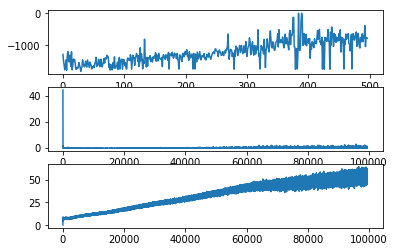

In [9]:
from utils import show_graph

def dense_layers(inputs, units_list, trainable):
    net = inputs
    for n_units in units_list:
        net = tf.layers.dense(net, n_units, trainable=trainable)
        net = tf.nn.relu(net)
    return net

def make_critic(observation: tf.Tensor, action: tf.Tensor,
                observation_units_list=[64], action_units_list=[], combined_units_list=[64],
                trainable=True):
    obs_net = dense_layers(observation, units_list=observation_units_list, trainable=trainable)
    act_net = dense_layers(action, units_list=action_units_list, trainable=trainable)
    
    net = tf.concat([obs_net, act_net], axis=1)
    net = dense_layers(net, units_list=combined_units_list, trainable=trainable)
    
    output = tf.layers.dense(net, units=1, trainable=trainable)
    return tf.identity(output, name='q')

def make_actor(observation: tf.Tensor, action_size, units_list=[64, 32], trainable=True):
    net = dense_layers(observation, units_list=units_list, trainable=trainable)
    output = tf.layers.dense(net, units=action_size, trainable=trainable)
    output = tf.nn.tanh(output)
    return tf.identity(output, name='mu')

def copy_all_vars(scope_origin: str, scope_target: str):
    origin_vars = tf.global_variables(scope=scope_origin)
    target_vars = tf.global_variables(scope=scope_target)
    var_pair_list = zip(origin_vars, target_vars)
    assign_ops = [tf.assign(t, o, name='assign_' + str(i)) for i, (o, t) in enumerate(var_pair_list)]
    return tf.group(assign_ops)

def update_target_vars(scope_origin: str, scope_target: str, tau: float = 0.001):
    origin_vars = tf.global_variables(scope=scope_origin)
    target_vars = tf.global_variables(scope=scope_target)
    var_pair_list = zip(origin_vars, target_vars)
    assign_ops = [tf.assign(
        t, tf.add(tf.multiply(tau, o, name='new_' + str(i)),
                  tf.multiply((1 - tau), t, name='old_' + str(i)), name='add_' + str(i)),
        name='assign_' + str(i)) for i, (o, t) in enumerate(var_pair_list)]
    return tf.group(assign_ops)


env = gym.make('Pendulum-v0')
print(env.observation_space.shape)
print(env.action_space.shape)

observation_size = env.observation_space.shape[0]
action_size = env.action_space.shape[0]

gamma = 0.99
tau = 0.001
critic_learning_rate = 0.01
actor_learning_rate = 0.001

tf_graph = tf.Graph()
with tf_graph.as_default():
    obs_ph = tf.placeholder(dtype=tf.float32, shape=[None, observation_size], name='observation')
    act_ph = tf.placeholder(dtype=tf.float32, shape=[None, action_size], name='action')
    reward_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='reward')
    obs_next_ph = tf.placeholder(dtype=tf.float32, shape=[None, observation_size], name='observation_next')
    
    with tf.variable_scope('actor'):
        mu = make_actor(obs_ph, action_size=action_size)
        
    with tf.variable_scope('critic') as critic_scope:
        q = make_critic(obs_ph, act_ph)
        
    with tf.variable_scope('target_actor'):
        mu_target = make_actor(obs_next_ph, action_size=action_size, trainable=False)
        
    with tf.variable_scope('target_critic'):
        q_target = make_critic(obs_next_ph, mu_target, trainable=False)
        
    with tf.variable_scope('init_target'):
        with tf.variable_scope('actor'):
            init_target_actor = copy_all_vars(scope_origin='actor', scope_target='target_actor')
        with tf.variable_scope('critic'):
            init_target_critic = copy_all_vars(scope_origin='critic', scope_target='target_critic')
            
    with tf.variable_scope('update_target'):
        with tf.variable_scope('actor'):
            update_target_actor = update_target_vars(scope_origin='actor', scope_target='target_actor', tau=tau)
        with tf.variable_scope('critic'):
            update_target_critic = update_target_vars(scope_origin='critic', scope_target='target_critic', tau=tau)
            
    with tf.variable_scope('critic_loss'):
        y = reward_ph + gamma * q_target
        critic_loss = tf.losses.mean_squared_error(predictions=q, labels=y)
        critic_optimizer = tf.train.AdamOptimizer(learning_rate=critic_learning_rate).minimize(critic_loss)
        
    with tf.variable_scope('actor_loss'):
        with tf.variable_scope(critic_scope, reuse=True):
            q_mu = make_critic(obs_ph, mu, trainable=False)
        actor_loss = - tf.reduce_mean(q_mu)
        actor_optimizer = tf.train.AdamOptimizer(learning_rate=actor_learning_rate).minimize(actor_loss)
    
    show_graph(tf_graph.as_graph_def())

    with tf.Session(graph=tf_graph).as_default():
        tf.global_variables_initializer().run()
        tf.get_default_session().run([init_target_actor, init_target_critic])
        obs_cur = env.reset()
        action_cur = mu.eval(feed_dict={obs_ph: obs_cur.reshape([1, -1])})[0]
        obs_next, reward, done, _info = env.step(action_cur)
        print(obs_cur, action_cur, reward, obs_next, done)
        
    replay_buffer = []
    replay_buffer_cursor = 0
    replay_buffer_maxlen = 10**6
    batch_size = 64

    with tf.Session(graph=tf_graph).as_default():
        sess = tf.get_default_session()
        sess.run(tf.global_variables_initializer())
        sess.run([init_target_actor, init_target_critic])
        
        obs_cur = env.reset()
        done = False
        
        episode_returns = []
        episode_return = 0
        
        critic_losses = []
        actor_losses = []
        
        for step_i in range(10**5):
            if done:
                print('#{}\treturn: {}\tactor_loss: {}\tcritic_loss: {}'.format(
                    step_i, episode_return, actor_loss_val, critic_loss_val))
                episode_returns.append(episode_return)
                episode_return = 0
                obs_cur = env.reset()
                done = False
                continue
                
            action = mu.eval(feed_dict={obs_ph: obs_cur.reshape([1, -1])})[0]
            obs_next, reward, done, _info = env.step(action)
            episode_return += reward
            
            experience = {'obs_cur': obs_cur, 'action': action, 'reward': reward, 'obs_next': obs_next}
            if len(replay_buffer) < replay_buffer_maxlen:
                replay_buffer.append(experience)
            else:
                replay_buffer[replay_buffer_cursor] = experience
                replay_buffer_cursor = (replay_buffer_cursor + 1) % replay_buffer_maxlen
                
            if len(replay_buffer) >= batch_size:
                sample = random.sample(replay_buffer, batch_size)
                
                obs_mat = np.array([e['obs_cur'] for e in sample])
                action_mat = np.array([e['action'] for e in sample])
                reward_mat = np.array([[e['reward']] for e in sample])
                obs_next_mat = np.array([e['obs_next'] for e in sample])
                
                critic_loss_val, actor_loss_val, _, _ = sess.run(
                    [critic_loss, actor_loss, critic_optimizer, actor_optimizer],
                    feed_dict={
                        obs_ph: obs_mat, act_ph: action_mat, reward_ph: reward_mat, obs_next_ph: obs_next_mat
                    })
                
                if (step_i + 1) % 10 == 0:
                    sess.run([update_target_critic, update_target_actor])
                
                critic_losses.append(critic_loss_val)
                actor_losses.append(actor_loss_val)
                
            obs_cur = obs_next

plt.figure(1)
plt.subplot(211)
plt.plot(episode_returns)

losses = pd.DataFrame({
    'critic loss': critic_losses,
    'actor loss': actor_losses
})

plt.subplot(212)
losses.plot()

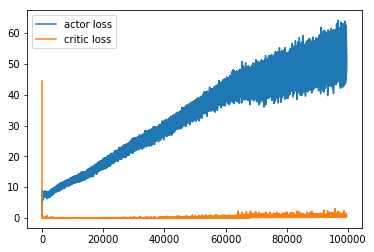

In [12]:
losses = pd.DataFrame({
    'critic loss': critic_losses,
    'actor loss': actor_losses
})

#plt.subplot(212)
losses.plot()

In [5]:
np.array([[1, 2], [3, 4], [5, 6]])

array([[1, 2],
       [3, 4],
       [5, 6]])

In [6]:
dir(tf.GraphDef())

['ByteSize',
 'Clear',
 'ClearExtension',
 'ClearField',
 'CopyFrom',
 'DESCRIPTOR',
 'DiscardUnknownFields',
 'Extensions',
 'FindInitializationErrors',
 'FromString',
 'HasExtension',
 'HasField',
 'IsInitialized',
 'LIBRARY_FIELD_NUMBER',
 'ListFields',
 'MergeFrom',
 'MergeFromString',
 'NODE_FIELD_NUMBER',
 'ParseFromString',
 'RegisterExtension',
 'SerializePartialToString',
 'SerializeToString',
 'SetInParent',
 'VERSIONS_FIELD_NUMBER',
 'VERSION_FIELD_NUMBER',
 'WhichOneof',
 '_CheckCalledFromGeneratedFile',
 '_SetListener',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_extensions_by_name',
 '_extensions_by_number',
 '_tf_api_n